# ***Put yourname here and give a brief description of what you plan to do (see instructions of the assignment)***

Exploratory data analysis and visualization of employee churn dataset using matplotlib and seaborn, model building and evaluation using python scikit-learn package.

Predicting Employee Churn with Machine Learning (Colab)

Classification model trained on 14,999 employees

# **Description of the dataset**

The dataset contains 14,999 samples, and 9 attributes or features (6 integer, 2 float, and 2 objects), and 'left', the 'Target' variable  (what we want to predict).

The 10 variables are as follows:

1. satisfaction_level: employee satisfaction (0-1).  
2. last_evaluation: evaluated performance by the employer (0-1).
3. number_projects: numbers of projects assigned to an employee
4. average_monthly_hours: ave numbers of hours worked by an employee in a month
5. time_spent_company: employee experience measured as number of years in Co.
6. work_accident: Whether an employee has had a work accident
7. promotion_last_5years: promotion in the last 5 years
8. Departments: Employee's department
9. Salary: Salary level of the employee (low, medium and high).
10.left: 1 = employee left the Co. 0 = did not leave.

# New Section

In [1]:
#import modules
import pandas  # for dataframes manipulations
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import numpy as np
#MODEL
from imblearn.over_sampling import SMOTE # will not use this yet
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
#Mount your google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# read dataset into HRdf dataframe from Data Directory and display top and bottom rows of the dataframe
HRdf=pandas.read_csv('/content/drive/MyDrive/Data/HR_Employee_churn.csv')
HRdf

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


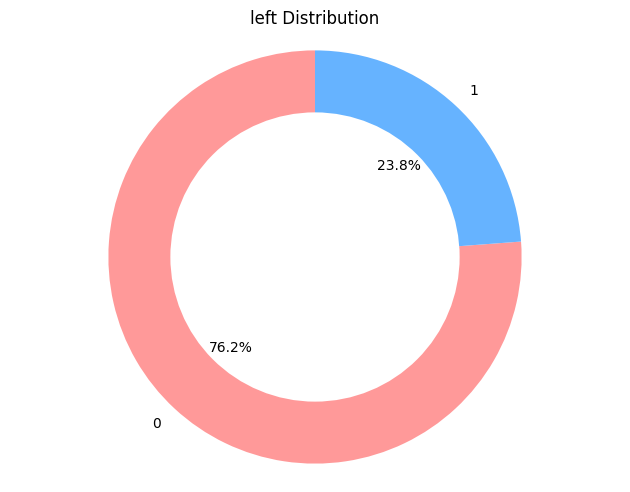

In [4]:
# Visualize the 'left' Imbalance with pie chart since the minority class is small ~ 'left = 1'.
import matplotlib.pyplot as plt

class_counts = HRdf['left'].value_counts()
labels = class_counts.index
sizes = class_counts.values

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal')
plt.tight_layout()
plt.title('left Distribution')
plt.show()


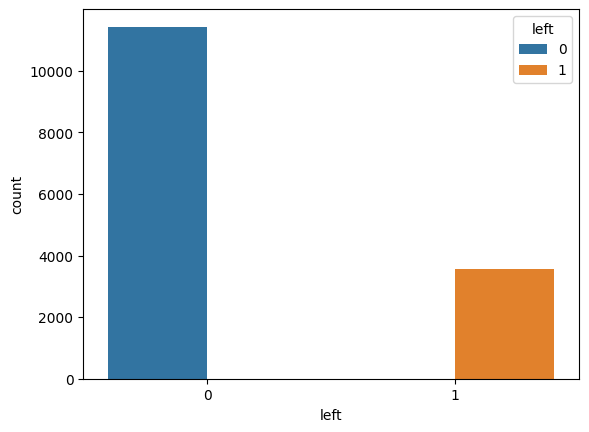

In [5]:
sns.countplot(x='left', data=HRdf, hue='left')
plt.show()

In [6]:
#check attributes names, null values and datatypes using info().
#dataset contains 14,999 instances, and 9 features and 1 target (6 integer, 2 float, and 2 objects).
#float32 is a 32 bit number - float64 uses 64 bits.
#That means that float64’s take up twice as much memory - and doing operations on them may be a lot slower in some machine architectures.
#However, float64’s can represent numbers much more accurately than 32 bit floats.

HRdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
HRdf.isnull().sum() # another way to count null values in dataset

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

In this dataset, we have two types of employee, those who stayed and those that left the company. Compare their characteristics by group (the column 'left'). Here, you can find the average of both the groups using groupby() and mean() function.

In [8]:
left = HRdf.groupby('left') #  (1=left, 0=remain with Company)
left.mean() # mean of the variables group by 'left' 1 and 0 ~ notice 'Departments' and 'salary' are not in the output (they are not numeric but objects)

<ipython-input-8-92cecf1ce16a>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  left.mean() # mean of the variables group by 'left' 1 and 0 ~ notice 'Departments' and 'salary' are not in the output (they are not numeric but objects)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Use the 'describe()' function in pandas to get various summary statistics.

This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data (except 'Departments' and 'salary' are not in the output as they are not numeric but objects)

In [9]:
HRdf.describe() # Summary statistics of dataframe ~ use '.T' to transpose the table

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


**Data Visualization**

Compare the number of employees that left the company 'left' = 1 and those that stayed 'left' = 0

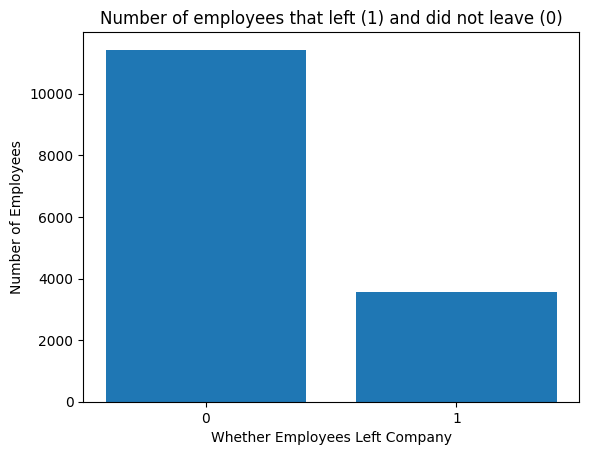

In [10]:
from operator import index
left_count=HRdf.left.value_counts()
plt.bar(left_count.index.values, left_count)
plt.title('Number of employees that left (1) and did not leave (0)')
plt.xlabel('Whether Employees Left Company')
plt.xticks(HRdf.left.unique())
plt.ylabel('Number of Employees')
plt.show()

In [11]:
#Here, you can see that out of 15,000 approx 3,571 left ('left' column =1), and 11,428 stayed. The no of employee left is 23 % of the total employee.
print(HRdf.left.value_counts()) # get a count of how many employees left and how many stayed.

0    11428
1     3571
Name: left, dtype: int64


In [12]:
# Check the % of imbalance cases in the dataset
HRdf['left'].value_counts(normalize=True)

0    0.761917
1    0.238083
Name: left, dtype: float64

In [13]:
#Here, you can see that out of 15,000 employees, approx 319  got a promotion within last 5 yrs. ('promotion_last_5years' column =1), and 14,680 did not get a promotion.
HRdf.promotion_last_5years.value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

In [14]:
# # Calculate the percentage of employees who got a promotion
total_employees = len(HRdf) # First calculate the total number of employees

# Calculate the number of employees who got a promotion
promoted_employees = len(HRdf[HRdf['promotion_last_5years'] == 1])

# Calculate the percentage of employees who got a promotion
promotion_percentage = (promoted_employees / total_employees) * 100
a='abc'
print(f"The percentage of employees who got a promotion is: {promotion_percentage:.3f} %")


The percentage of employees who got a promotion is: 2.127 %


Number of Projects

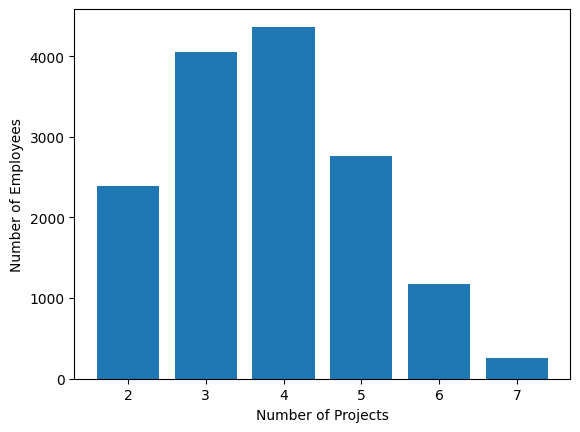

In [15]:
# bar chart to show the number of projects employees are involved in?

num_projects=HRdf.groupby('number_project').count()
plt.bar(num_projects.index.values, num_projects['satisfaction_level'])
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.show()

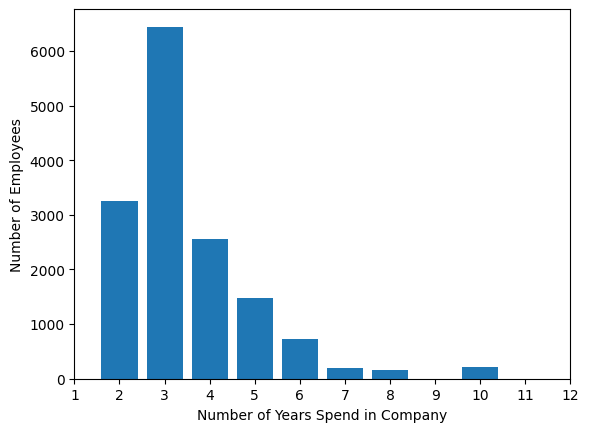

In [16]:
#Time Spent in Company ~ as an indicator of employee work experience
# bar chart to show the number of employees and their years of experience in the company?
time_spent=HRdf.groupby('time_spend_company').count()
plt.bar(time_spent.index.values, time_spent['satisfaction_level'])
plt.xlabel('Number of Years Spend in Company')
plt.xticks(range(1,13,1))
plt.ylabel('Number of Employees')
plt.show()


<ipython-input-17-7308f3ef3721>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 2, i+1)


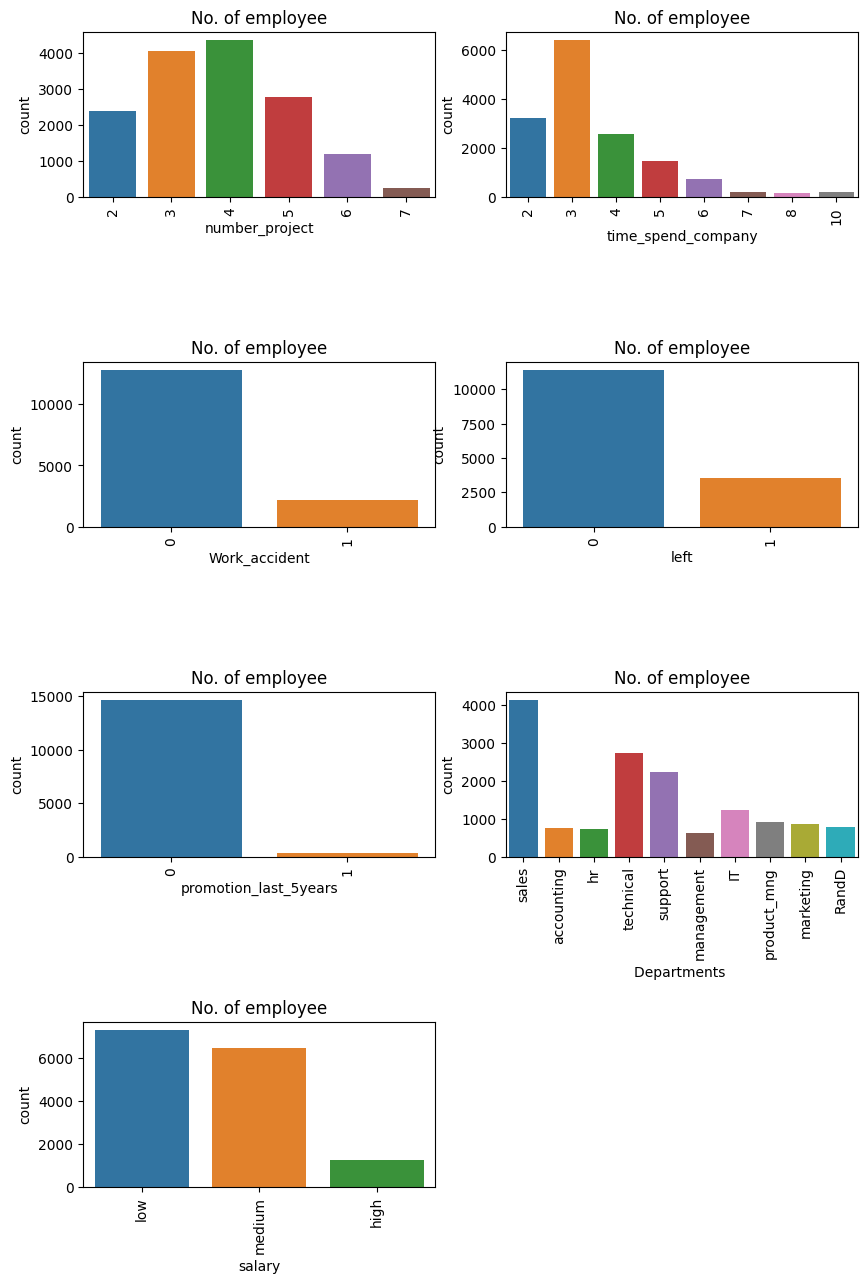

In [17]:
#Subplots using Seaborn library to plot all the graphs in a single cell.
features=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','Departments ','salary']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = HRdf)
    plt.xticks(rotation=90)
    plt.title("No. of employee")

From the above visualization:

Most of the employee were involved in 3-5 projects.

The highest number of employee have 3 years of experience then it tapers off.

The number of employee that quit is about [3571 / (11428+3571)] 23.8 %.

The number of employee promoted in the last 5 year is about [319 / (14680+319)] 2.1%

The sales department has the maximum no.of employee followed by technical and support

Most of the employees are earning in the medium or low salary range.

<ipython-input-18-2a57c7bcb7c8>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 3, i+1)


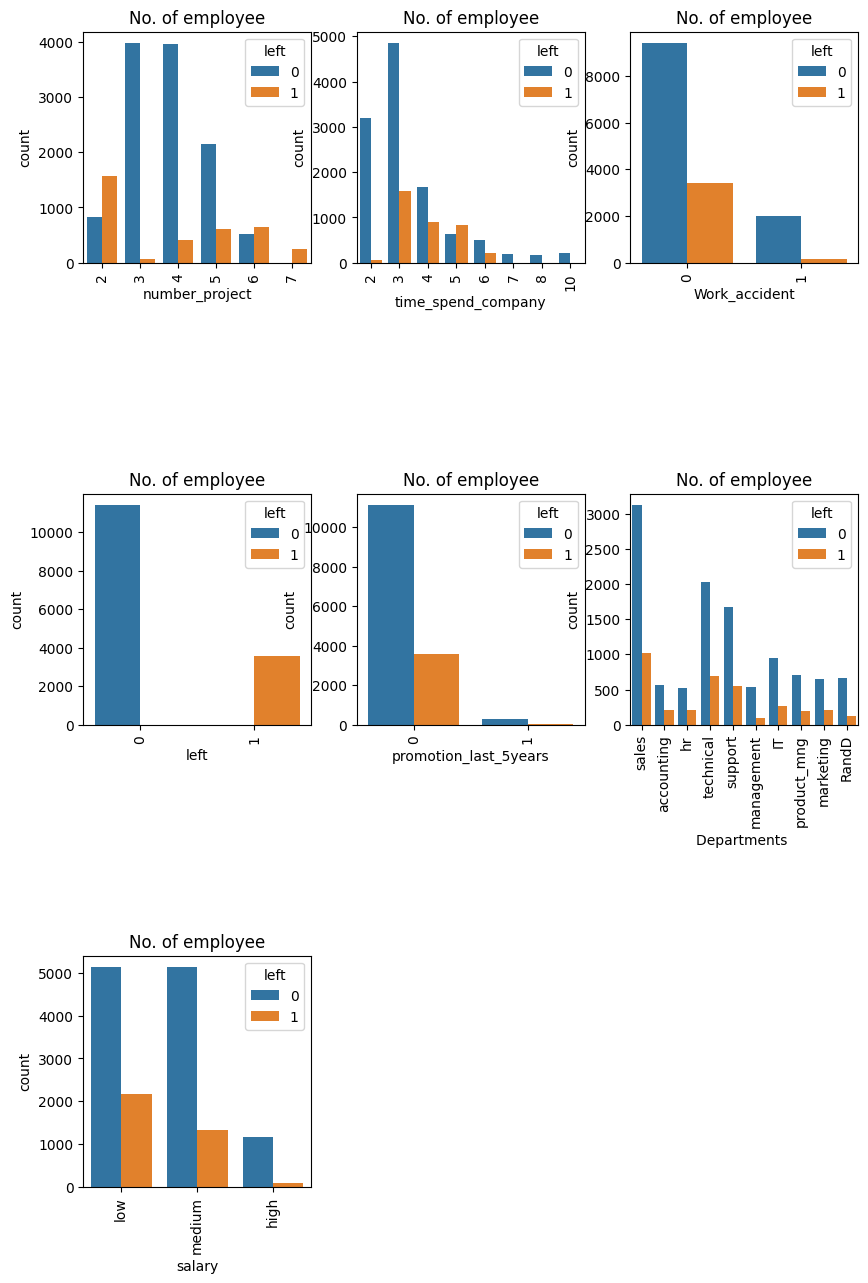

In [18]:
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = HRdf, hue='left')
    plt.xticks(rotation=90)
    plt.title("No. of employee")

You can observe the following points in the above visualization:

Those employees who are involved in more than 5 projects leave the company.

The employee who had done 6 and 7 projects, over worked, tend to leave.

Most employee leave after 3 to 5 years at the company.

Employees that had a promotion in the last 5 years tend to stay, i.e., all those left they didn't get the promotion in the last 5 years.

Data Analysis and Visualization Summary:

The features that most influence a person to leave the company:

Promotions: Employees are far more likely to quit their job if they did not get promoted in the last 5 years.

Time with Company: The three-year mark looks like a critical point in an employee's career. Most of them quit their job around the three-year mark. Another important point is 6-years point, where the employee is very unlikely to leave.

Number Of Projects: Employee engagement is another critical factor to influence the employee to quit. Employees with 3-5 projects are less likely to leave the company.

Salary: Most of the employees that quit are among the low salary category.

Cluster Analysis:

Let's find out the groups of employees who left. You can observe that the most important factor for any employee to stay or leave is satisfaction and performance in the company. So let's bunch them in the group of people using cluster analysis.

In [19]:
#import module
from sklearn.cluster import KMeans
import warnings # to suppress warnings
# Filter data
left_emp =  HRdf[['satisfaction_level', 'last_evaluation']][HRdf.left == 1]
# Create groups using K-means clustering.
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


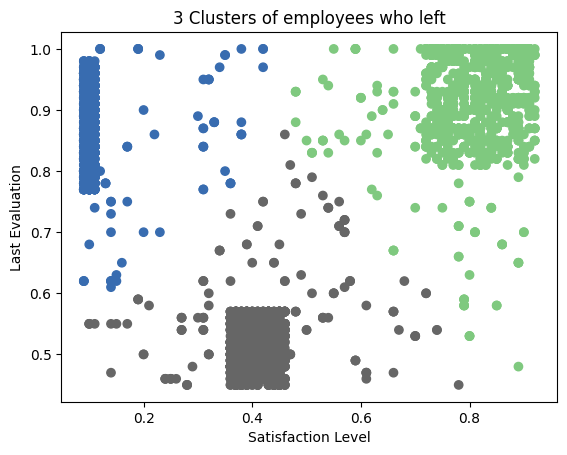

In [20]:
# Add new column "label" annd assign cluster labels.
left_emp['label'] = kmeans.labels_
# Draw scatter plot
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['label'],cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.show()


Here, Employee who left the company can be grouped into 3 type of employees:
High Satisfaction and High Evaluation(Shaded by green color in the graph), you can also call them Winners.
Low Satisfaction and High Evaluation(Shaded by blue color(Shaded by green color in the graph), you can also call them Frustrated.
Moderate Satisfaction and moderate Evaluation (Shaded by grey color in the graph), you can also call them 'Bad match'.

Building a Prediction Model

Pre-Processing Data
Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column. In order to encode this data, you could map each value to a number. e.g. Salary column's value can be represented as low:0, medium:1, and high:2. This process is known as label encoding, and sklearn conveniently will do this for you using LabelEncoder.

In [21]:
HRdf # see 'Departments' & 'salary' columns.

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [22]:
n = HRdf.nunique(axis=0) # unique values of each column in the dataframe HRdf ~ there are 10 unique departments and 3 unique salary grouping
n

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
Departments               10
salary                     3
dtype: int64

In [23]:
#import preprocessing module and created Label Encoder object to fit and transform "salary" and "Departments " columns into numeric column.
# there are 3 levels of 'Salary' ~ "Low", "Medium" & "High"
# There are 10 'Department' ~ "accounting","hr","IT","management","marketing","product_mng","RandD","sales",suppport",& "technical"
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
HRdf['salary']=le.fit_transform(HRdf['salary'])
HRdf['Departments ']=le.fit_transform(HRdf['Departments '])

In [24]:
# Look at the 'Department' and the 'salary ' column after the transformation
HRdf


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,1
14995,0.37,0.48,2,160,3,0,1,0,8,1
14996,0.37,0.53,2,143,3,0,1,0,8,1
14997,0.11,0.96,6,280,4,0,1,0,8,1


In [25]:
# check the 'Class' column to determine the number of fraud cases (492 fraud transactions).
HRdf['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

Split the dataframe into Training and Testing Set using sklearn

train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data. With this function, you don't need to divide the dataset manually.

By default, Sklearn train_test_split will make random partitions for the two subsets. However, you can also specify a random state for the operation.

Divide the dataset into training and testing set by splitting the HRdf dataset using the function "train_test_split()" function.

3 parameters are needed as input to the function: features, target, and test_set size, typically 25 to 30% for testing.

Use random_state to select records randomly.

In [26]:
X=HRdf.drop(columns='left')

In [27]:
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,0,7,1
1,0.80,0.86,5,262,6,0,0,7,2
2,0.11,0.88,7,272,4,0,0,7,2
3,0.72,0.87,5,223,5,0,0,7,1
4,0.37,0.52,2,159,3,0,0,7,1
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,8,1
14995,0.37,0.48,2,160,3,0,0,8,1
14996,0.37,0.53,2,143,3,0,0,8,1
14997,0.11,0.96,6,280,4,0,0,8,1


In [28]:
# create the X and y variable array
#X=HRdf[['satisfaction_level', 'last_evaluation', 'number_project',
#       'average_montly_hours', 'time_spend_company', 'Work_accident',
#       'promotion_last_5years', 'Departments ', 'salary']] # the X variable includes all 9 features
# or just drop the 'left' variable like previous assignments
#X=HRdf.drop(columns='left')
y=HRdf['left'] # the target variable is the 'left' variable ~ put column into 'y'

In [29]:
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [30]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% of the dataset is used for training and 30% test

In [31]:
# check out the training (70%) and testing (30%) datasets
print("Number of transactions in X_train dataset: ", X_train.shape)
print("Number of transactions in y_train dataset: ", y_train.shape)
print("Number of transactions in X_test dataset: ", X_test.shape)
print("Number of transactions in y_test dataset: ", y_test.shape)

Number of transactions in X_train dataset:  (10499, 9)
Number of transactions in y_train dataset:  (10499,)
Number of transactions in X_test dataset:  (4500, 9)
Number of transactions in y_test dataset:  (4500,)


In [32]:
X_test # 30% of the dataset (30% of 14999)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary
6723,0.65,0.96,5,226,2,1,0,5,2
6473,0.88,0.80,3,166,2,0,0,0,1
4679,0.69,0.98,3,214,2,0,0,7,1
862,0.41,0.47,2,154,3,0,0,7,1
7286,0.87,0.76,5,254,2,1,0,3,1
...,...,...,...,...,...,...,...,...,...
13388,0.85,0.81,4,260,3,0,0,6,2
10463,0.21,0.43,2,249,3,0,0,5,1
5331,0.78,0.53,3,156,3,0,0,6,1
7499,0.93,0.58,5,238,2,0,0,7,2


In [33]:
y_test

6723     0
6473     0
4679     0
862      1
7286     0
        ..
13388    0
10463    0
5331     0
7499     0
11796    0
Name: left, Length: 4500, dtype: int64

In [34]:
X_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary
12602,0.10,0.84,7,250,4,0,0,6,1
4889,0.57,0.68,4,154,3,1,0,4,2
1572,0.39,0.48,2,154,3,0,0,9,1
13375,0.91,0.68,4,132,4,0,0,0,2
879,0.82,0.97,5,263,5,0,0,9,2
...,...,...,...,...,...,...,...,...,...
5191,0.52,0.96,4,246,3,0,0,8,1
13418,0.49,0.65,4,233,7,0,0,7,2
5390,0.66,0.73,5,249,2,0,0,8,2
860,0.79,1.00,4,218,5,0,0,7,1


**Model Building **

**There are a number of classification models:**
1.   logistic regression
2.   decision tree
1.   random forest
1.   gradient-boosted tree
2.   multilayer perceptron
2.   one-vs-rest (mainly for multiple class)
1.   Naive Bayes
1.   Support Vector Machine (SVM)





To use the various Classifier.
First, import the Classifier module and create classifier object using Classifier() function.
Then, fit your model on training set using fit() and perform prediction on the test set using predict().

***1. Logistic Regression***

Logistic Regression to predict churn. First, import the Logistic Regression module and create Logistic Regression object using LogisticRegression(solver='lbfgs', max_iter=1000) function. Then, fit your model on train set using fit() and perform prediction on the test set using predict().

In [35]:
# Use Logistic Regression to predict
# Import the Scikit Learn Logistic Regression module
from sklearn.linear_model import LogisticRegression

#Create Logistic regression Classifier
lg = LogisticRegression(solver='lbfgs', max_iter=1000)

#Train the model using the training sets
lg.fit(X_train,y_train)

#Predict the response for test dataset
lg_y_pred = lg.predict(X_test)

When you are done skip to the Evaluating Model Performance cell below and evaluate the performance of the model with the test dataset "y_test"

**2. Decision Tree**

In [36]:
#Import DecisionTree Classifier model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_y_pred = dt.predict(X_test)

**3. Random Forest**

In [37]:
#Import RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)

**4.Gradient Boosting Classifier**

In [38]:
#Import Gradient Boosting Classifier model
from sklearn.ensemble import GradientBoostingClassifier

#Create Gradient Boosting Classifier
gb = GradientBoostingClassifier()

#Train the model using the training sets
gb.fit(X_train, y_train)

#Predict the response for test dataset
gb_y_pred = gb.predict(X_test)

**5. Multilayer Perceptron**

In [39]:
# Import MLPClassifier
from sklearn.neural_network import MLPClassifier

# Create an instance of MLPClassifier
mlp = MLPClassifier()

# Train the model
mlp.fit(X_train, y_train)

# Make Predictions
mlp_y_pred = mlp.predict(X_test)

**6. One-Vs._Rest**

In [40]:
from sklearn.neural_network import MLPClassifier

# Assuming 'X_train', 'y_train', 'X_test' are your data

# Create an instance of MLPClassifier with One-Versus-Rest strategy
ovr = MLPClassifier()

# For OvR in binary classification, you'll need to convert y_train to a binary label
# For example, if you want to classify class 1 vs rest, you'd convert y_train to 1 for class 1 and 0 for all other classes
y_train_binary = (y_train == 1)

# Train the model
ovr.fit(X_train, y_train_binary)

# Make Predictions
y_pred_binary = ovr.predict(X_test)

# Convert back to original class labels if needed
ovr_y_pred = y_pred_binary  # Since it's a binary classification

**7. Naive Bayes**

In [41]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_y_pred = nb.predict(X_test)

**8. Support Vector Machine**

In [42]:
#Import Support Vector Machine Classifier model
from sklearn.svm import SVC
svm = SVC()
#Train the model using the training sets
svm.fit(X_train, y_train)
#svm_score = cross_val_score(svm_model , x_train , y_train ,cv = k ,scoring = 'neg_mean_squared_error')
svm_y_pred = svm.predict(X_test)

**Evaluating Model Performance**

**1. Confusion Matrix**



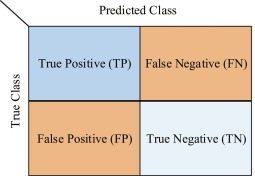

In [43]:
# confusion matrix is used for displaying the primitive result of one machine learning model, below is an example for Decision Tree model
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True` above.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, lg_y_pred, labels=[1,0]))

[[ 255  817]
 [ 261 3167]]


In [44]:
# Compute confusion matrix: you are computing the matrix using the "lg_y_predict" to see the matric or the other classifiers you need to run that classifier then change the "?" in "?_y_predict"
cnf_matrix = confusion_matrix(y_test, lg_y_pred, labels=[1,0])
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[ 255  817]
 [ 261 3167]]


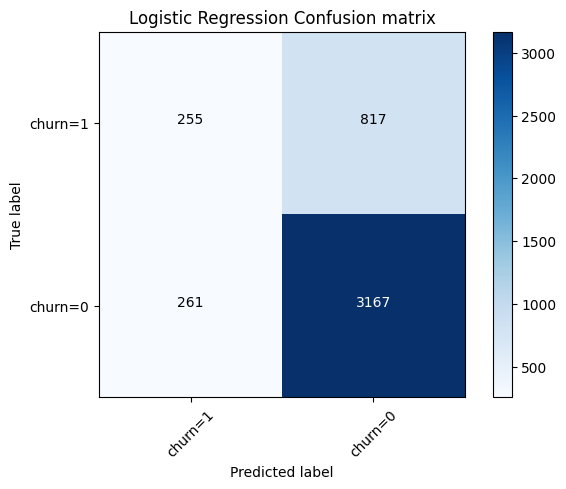

In [45]:
#Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Logistic Regression Confusion matrix')

In [46]:
# print classification report
print(classification_report(y_test, lg_y_pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      3428
           1       0.49      0.24      0.32      1072

    accuracy                           0.76      4500
   macro avg       0.64      0.58      0.59      4500
weighted avg       0.72      0.76      0.73      4500



In [50]:
# collect metrics score for comparison report
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
cnf_metrics_origin=[metrics.precision_score(y_test, lg_y_pred),metrics.accuracy_score(y_test, lg_y_pred),metrics.recall_score(y_test, lg_y_pred),metrics.f1_score(y_test, lg_y_pred)]

In [51]:
cnf_metrics_origin

[0.4941860465116279,
 0.7604444444444445,
 0.23787313432835822,
 0.3211586901763224]

**2. Performance Metrics**

The most frequently used performance metrics for classification:

*Accuracy*

*Precision*

*Specificity*

*F-score*

From the logistic regression output:

TP = 103; FN

FP = 0   ; TN

*Accuracy* = (TP + TN) / (TP + FP + TN + FN)  

*Precision* = TP / (TP + FP)
         
*Recall* = TP / (TP + FN)
             
*Specifity* = TN / (TN + FP)
            
*F-score* = (2 x Precision x Recall) / (Precision + Recall)
          


# You must run all the classifiers above before you run the following cell to get all evaluation metrix **or the system will throw an error.**

In [52]:

# Model Accuracy, how often is the classifier correct? Calculate accuracy for each model.
lg_accuracy=metrics.accuracy_score(y_test,lg_y_pred)
dt_accuracy=metrics.accuracy_score(y_test,dt_y_pred)
rf_accuracy=metrics.accuracy_score(y_test,rf_y_pred)
gb_accuracy=metrics.accuracy_score(y_test,gb_y_pred)
mlp_accuracy=metrics.accuracy_score(y_test,mlp_y_pred)
ovr_accuracy=metrics.accuracy_score(y_test,ovr_y_pred)
nb_accuracy=metrics.accuracy_score(y_test,nb_y_pred)
svm_accuracy=metrics.accuracy_score(y_test,svm_y_pred)
# Model Precision
lg_precision=metrics.precision_score(y_test,lg_y_pred)
dt_precision=metrics.precision_score(y_test,dt_y_pred)
rf_precision=metrics.precision_score(y_test,rf_y_pred)
gb_precision=metrics.precision_score(y_test,gb_y_pred)
mlp_precision=metrics.precision_score(y_test,mlp_y_pred)
ovr_precision=metrics.precision_score(y_test,ovr_y_pred)
nb_precision=metrics.precision_score(y_test,nb_y_pred)
svm_precision=metrics.precision_score(y_test,svm_y_pred)
# Model Recall
lg_recall=metrics.recall_score(y_test,lg_y_pred)
dt_recall=metrics.recall_score(y_test,dt_y_pred)
rf_recall=metrics.recall_score(y_test,rf_y_pred)
gb_recall=metrics.recall_score(y_test,gb_y_pred)
mlp_recall=metrics.recall_score(y_test,mlp_y_pred)
ovr_recall=metrics.recall_score(y_test,ovr_y_pred)
nb_recall=metrics.recall_score(y_test,nb_y_pred)
svm_recall=metrics.recall_score(y_test,svm_y_pred)
# F-Score
lg_f_score=metrics.f1_score(y_test,lg_y_pred)
dt_f_score=metrics.f1_score(y_test,dt_y_pred)
rf_f_score=metrics.f1_score(y_test,rf_y_pred)
gb_f_score=metrics.f1_score(y_test,gb_y_pred)
mlp_f_score=metrics.f1_score(y_test,mlp_y_pred)
ovr_f_score=metrics.f1_score(y_test,ovr_y_pred)
nb_f_score=metrics.f1_score(y_test,nb_y_pred)
svm_f_score=metrics.f1_score(y_test,svm_y_pred)

In [53]:
# Put all the performance metrics for each of the eight models into a dataframe and show them.
report_data={'Model':['Logistic Regression','Decision Tree','Random Forest','Gradient Boosting','Multilayer Perceptron','One-Vs._Rest','Naive Bayes','Support Vector Machine'],
             'Accuracy':[lg_accuracy,dt_accuracy,rf_accuracy,gb_accuracy,mlp_accuracy,ovr_accuracy,nb_accuracy,svm_accuracy],
             'Precision':[lg_precision,dt_precision,rf_precision,gb_precision,mlp_precision,ovr_precision,nb_precision,svm_precision],
             'Recall':[lg_recall,dt_recall,rf_recall,gb_recall,mlp_recall,ovr_recall,nb_recall,svm_recall],
             'F-Score':[lg_f_score,dt_f_score,rf_f_score,gb_f_score,mlp_f_score,ovr_f_score,nb_f_score,svm_f_score]
             }
report_table=pandas.DataFrame(report_data)
report_table.set_index('Model',inplace=True)
report_table

,Accuracy,Precision,Recall,F-Score
Model,,,,
Logistic Regression,0.760444,0.494186,0.237873,0.321159
Decision Tree,0.971556,0.924460,0.958955,0.941392
Random Forest,0.988000,0.989423,0.959888,0.974432
Gradient Boosting,0.971556,0.958252,0.920709,0.939106
Multilayer Perceptron,0.927111,0.862573,0.825560,0.843661
One-Vs._Rest,0.921333,0.829963,0.842351,0.836111
Naive Bayes,0.799111,0.561674,0.713619,0.628595
Support Vector Machine,0.784667,1.000000,0.096082,0.175319


Accuracy: Accuracy (classification) rate of 97% (Gradient Boosting Classifier), 76%  (Logistic Regression).

Precision:
Precision is about being precise, i.e., how precise your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In your prediction case, when you predicted an employee is going to leave, that employee actually left 95% (Gradient Boosting model), 49% (Logistic Regression) of the time.

Recall: If there is an employee who left present in the test set and your model can identify it 92% (Gradient Boosting), 23% (Logistic Regression) of the time.
So which model is the better of the two?


In [54]:
# check the 'left' column to determine the number of employees that left the company.
HRdf['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [55]:
# Check the % of imbalance cases in the dataset
HRdf['left'].value_counts(normalize=True)

0    0.761917
1    0.238083
Name: left, dtype: float64

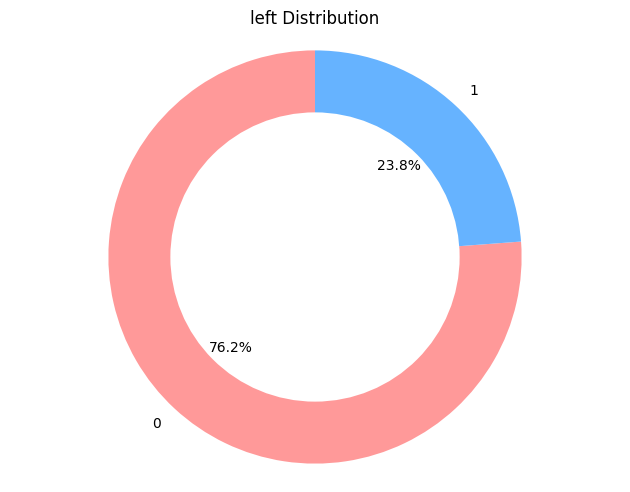

In [56]:
# Visualize the 'left' Imbalance with pie chart since the minority class is small ~ 'left = 1'.
import matplotlib.pyplot as plt

class_counts = HRdf['left'].value_counts()
labels = class_counts.index
sizes = class_counts.values

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal')
plt.tight_layout()
plt.title('left Distribution')
plt.show()


**Now we use SMOTE to balance the target column (i.e.the 'left' column) to remove the biase**

In [57]:
# use SMOTE to handle imbalance of 'Class'.
# For an explainination of SMOTE see Videos and readings in Assignment
smote = SMOTE(sampling_strategy='minority')
X_resample ,y_resample = smote.fit_resample(X ,y) # the training set increased from 284807 to 568630

In [58]:
# check the arrays of the x and y variables (Total of 568630 rows and 29 columns in 'x' and 568630 rows in 'y')
print('The resampled X data increased the origianl sample after SMOTE from {} to {}'.format(len(X),len(X_resample)))

The resampled X data increased the origianl sample after SMOTE from 14999 to 22856


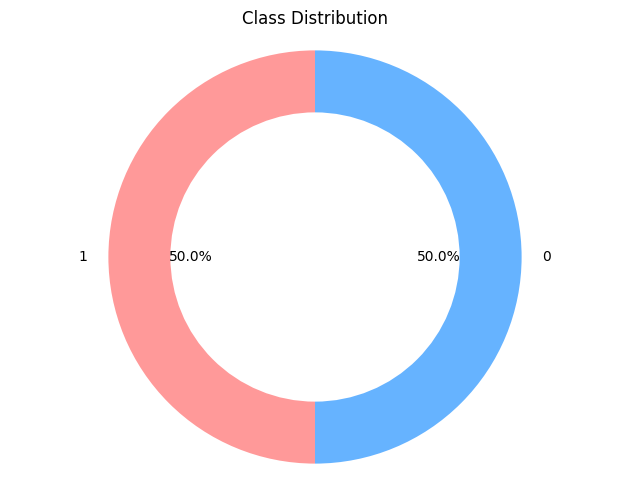

In [59]:
# Visualize the 'left' Imbalance with pie chart since the minority class is extremely small ~ 'left = 1'
import matplotlib.pyplot as plt

class_counts = y_resample.value_counts()
labels = class_counts.index
sizes = class_counts.values

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal')
plt.tight_layout()
plt.title('Class Distribution')
plt.show()

In [60]:
y_resample.value_counts() # look at the column "left'"

1    11428
0    11428
Name: left, dtype: int64

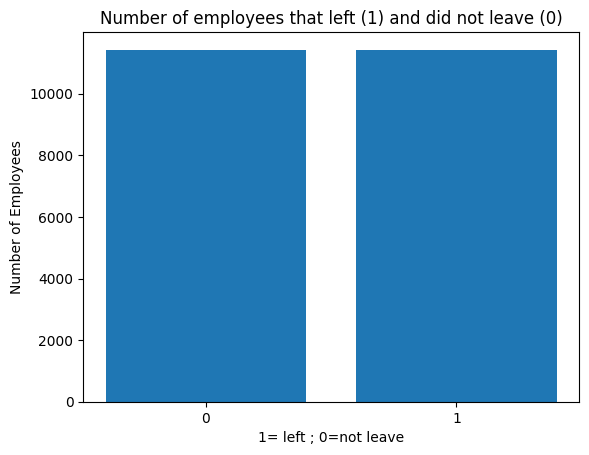

In [61]:
# the 'left' column visualized
from operator import index
left_count=y_resample.value_counts()
plt.bar(left_count.index.values, left_count)
plt.title('Number of employees that left (1) and did not leave (0)')
plt.xlabel('1= left ; 0=not leave')
plt.xticks(HRdf.left.unique())
plt.ylabel('Number of Employees')
plt.show()

Split the data into test and train sets using the resampled data (x_resample & y_resample)

In [62]:
# split into 70:30 ratio for training and testing the model.  You will need to use the resample x and y arrays for this (SMOTE applied)
x_train, x_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size = 0.3, random_state = 0)

In [63]:
# check out the training (70%) and testing (30%) datasets
print("Number of transactions in x_train dataset: ", x_train.shape)
print("Number of transactions in y_train dataset: ", y_train.shape)
print("Number of transactions in x_test dataset: ", x_test.shape)
print("Number of transactions in y_test dataset: ", y_test.shape)

Number of transactions in x_train dataset:  (15999, 9)
Number of transactions in y_train dataset:  (15999,)
Number of transactions in x_test dataset:  (6857, 9)
Number of transactions in y_test dataset:  (6857,)


Train a new model with the data on the SMOTE data set

In [64]:
# create the Logistic Regression object 'lr'
lr = LogisticRegression()

# train the model on train dataset (x_train, y_train)
lr.fit(x_train, y_train.ravel()) #The ravel() method is used to convert a 2D array into a flattened 1D array. It's often necessary because scikit-learn expects the target variable to be a 1D array.

y_pred = lr.predict(x_test) # use the 'x_test'(30%) to get the precdicted y values (0,1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
# Create the confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True` above.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_pred, labels=[1,0]))

[[2707  712]
 [ 913 2525]]


In [66]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[2707  712]
 [ 913 2525]]


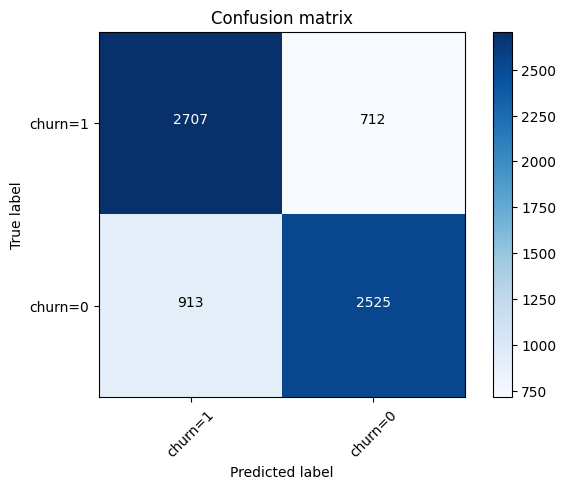

In [67]:
#Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [68]:
# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.73      0.76      3438
           1       0.75      0.79      0.77      3419

    accuracy                           0.76      6857
   macro avg       0.76      0.76      0.76      6857
weighted avg       0.76      0.76      0.76      6857



In [69]:
# collect metrics score from resample dataset
cnf_metrics_resample=np.array([metrics.precision_score(y_test,y_pred),metrics.recall_score(y_test,y_pred),metrics.accuracy_score(y_test,y_pred),metrics.f1_score(y_test,y_pred)])

In [70]:
cnf_metrics_resample

array([0.75, 0.79, 0.76, 0.77])

In [71]:
# Print comparison report before and after SMOTE
report_cmp=pandas.DataFrame([cnf_metrics_origin,cnf_metrics_resample],columns=['Precision','Accuracy','Recall','F-Score'],index=['Before SMOTE','After SMOTE'])
report_cmp

,Precision,Accuracy,Recall,F-Score
Before SMOTE,0.494186,0.760444,0.237873,0.321159
After SMOTE,0.747790,0.791752,0.763016,0.769143


Provide your recomendation here:
